Index number : 190026T

Name         : AHAMED M.I.I

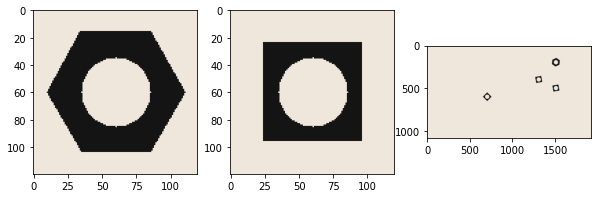

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt.subplots(1,3, figsize = (10, 5))
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()

Convert the images to grayscale and apply Otsu's thresholding

Threshold for hex nut =  20.0
Threshold for Square nut =  20.0
Threshold for Conveyor belt =  20.0


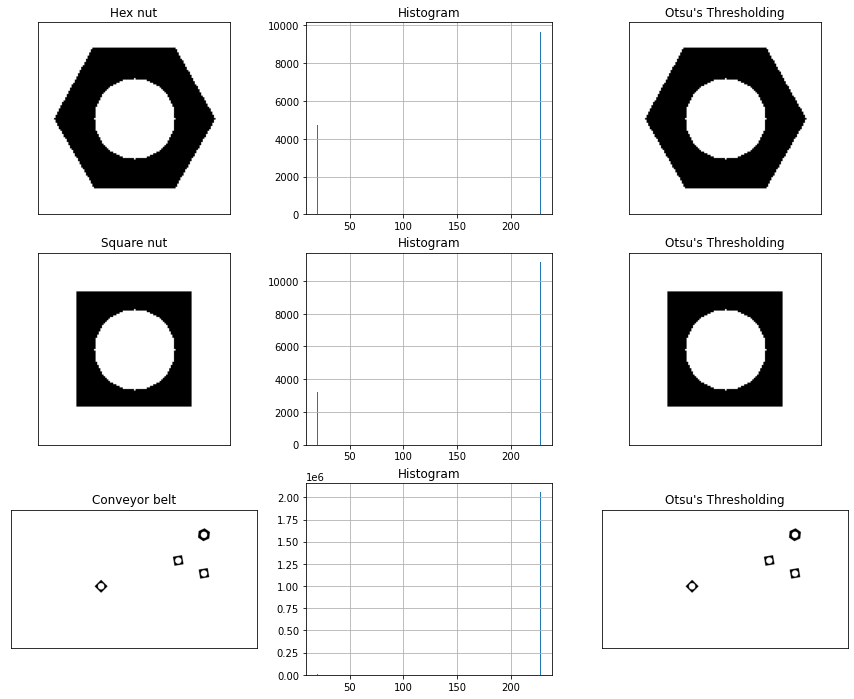

In [2]:
#Convert the images to grayscale
hexnut_template_gray = cv.cvtColor(hexnut_template, cv.COLOR_RGB2GRAY)
squarenut_template_gray =  cv.cvtColor(squarenut_template, cv.COLOR_RGB2GRAY)
conveyor_f100_gray =  cv.cvtColor(conveyor_f100, cv.COLOR_RGB2GRAY)


# Otsu's thresholding
ret1, hexnut_template_th = cv.threshold(hexnut_template_gray, 0,255, cv.THRESH_BINARY+cv.THRESH_OTSU)
ret2, squarenut_template_th = cv.threshold(squarenut_template_gray, 0,255, cv.THRESH_BINARY+cv.THRESH_OTSU)
ret3, conveyor_f100_th = cv.threshold(conveyor_f100_gray, 0,255, cv.THRESH_BINARY+cv.THRESH_OTSU)

print("Threshold for hex nut = ", ret1)
print("Threshold for Square nut = ", ret2)
print("Threshold for Conveyor belt = ", ret3)

images = [hexnut_template_gray, 0, hexnut_template_th, 
          squarenut_template_gray, 0, squarenut_template_th,
          conveyor_f100_gray, 0, conveyor_f100_th]

titles = ['Hex nut', 'Histogram', "Otsu's Thresholding",
          'Square nut', 'Histogram', "Otsu's Thresholding",
          'Conveyor belt', 'Histogram', "Otsu's Thresholding"]

fig, ax = plt.subplots(3, 3, figsize = (15, 12))

for i in range(3):
    ax[i][0].imshow(images[i*3], 'gray')
    ax[i][0].set_title(titles[i*3]), ax[i][0].set_xticks([]), ax[i][0].set_yticks([])

    ax[i][1].hist(images[i*3].ravel(), 256)
    ax[i][1].set_title(titles[i*3+1]), ax[i][1].grid(True)

    ax[i][2].imshow(images[i*3+2], 'gray')
    ax[i][2].set_title(titles[i*3+2]), ax[i][2].set_xticks([]), ax[i][2].set_yticks([])

morphological closing to remove small holes inside the foreground by using a 3×3 kernel

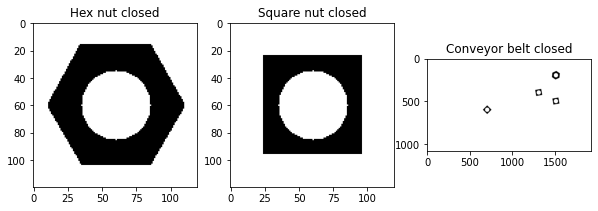

In [3]:
#3x3 kernel
kernel = np.ones((3, 3),np.uint8)

#closing
hexnut_template_closed = cv.morphologyEx(hexnut_template_th, cv.MORPH_CLOSE, kernel)
squarenut_template_closed = cv.morphologyEx(squarenut_template_th, cv.MORPH_CLOSE, kernel)
conveyor_f100_closed = cv.morphologyEx(conveyor_f100_th, cv.MORPH_CLOSE, kernel)

images = [hexnut_template_closed, squarenut_template_closed, conveyor_f100_closed]

titles = ['Hex nut closed','Square nut closed', 'Conveyor belt closed']

fig, ax = plt.subplots(1, 3, figsize = (10, 5))

for i in range(3):
    ax[i].imshow(images[i], 'gray')
    ax[i].set_title(titles[i])


Connected components analysis

Hex nut connected components = 3
Square nut connected components = 3
Conveyor belt connected components = 6


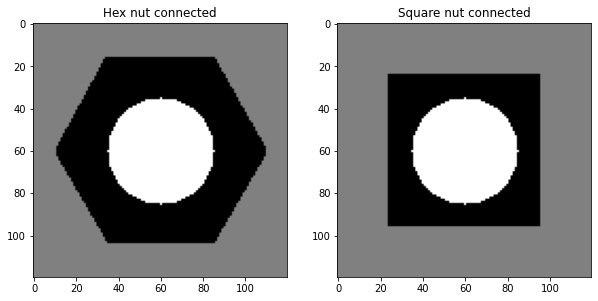

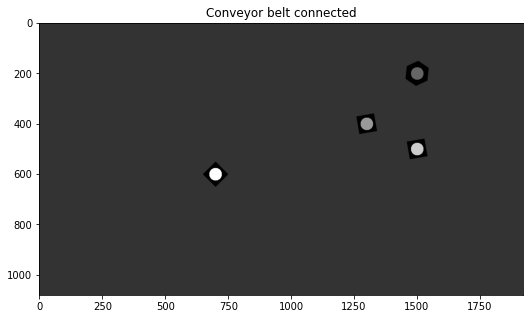

In [4]:
# apply connected component analysis to the thresholded image
# returns (numLabels, labels, stats, centroids)
hexnut_template_connected = cv.connectedComponentsWithStats(hexnut_template_closed, 4, cv.CV_32S)
squarenut_template_connected = cv.connectedComponentsWithStats(squarenut_template_closed, 4, cv.CV_32S)
conveyor_f100_connected = cv.connectedComponentsWithStats(conveyor_f100_closed, 4, cv.CV_32S)

numLabels = [hexnut_template_connected[0], squarenut_template_connected[0], conveyor_f100_connected[0]]
images = [hexnut_template_connected[1], squarenut_template_connected[1], conveyor_f100_connected[1]]
stats = [hexnut_template_connected[2], squarenut_template_connected[2], conveyor_f100_connected[2]]
centroids = [hexnut_template_connected[3], squarenut_template_connected[3], conveyor_f100_connected[3]] 

titles = ['Hex nut connected','Square nut connected', 'Conveyor belt connected']

fig, ax = plt.subplots(1, 2, figsize = (10, 5))

for i in range(2):
    ax[i].imshow(images[i], 'gray')
    ax[i].set_title(titles[i])

    print(titles[i], "components =", numLabels[i])

fig, ax = plt.subplots( figsize = (10, 5))
ax.imshow(images[2], 'gray')
ax.set_title(titles[2])
print(titles[2], "components =", numLabels[2])


Stats is a matrix of the stats that the function calculates. 

It has a length equal to the number of components. 

Width equal to the number of stats. There are 5 stats.

    1) Leftmost (x) coordinate which is the inclusive start of the bounding box in the horizontal direction.
    2) Topmost (y) coordinate which is the inclusive start of the bounding box in the vertical direction.
    3) The horizontal size of the bounding box
    4) The vertical size of the bounding box
    5) The total area (in pixels) of the connected component

Centroids are the cordinates of the cnetre of the bounding boxes.

area of componenet 1 = 4722
area of componenet 2 = 7717
area of componenet 3 = 1961


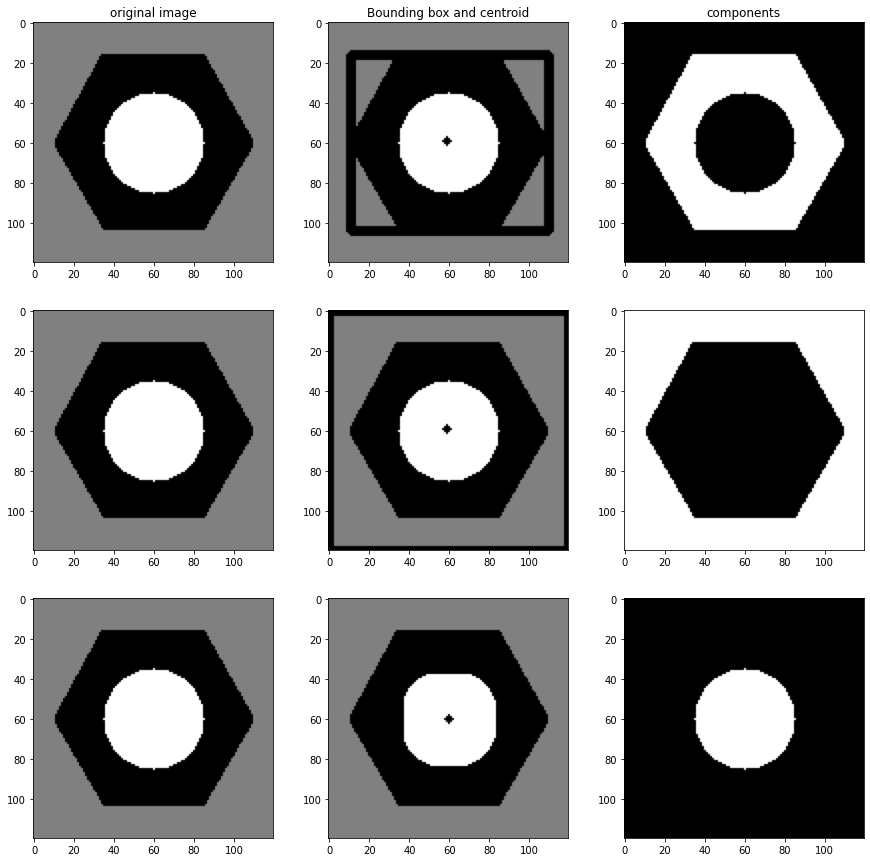

In [5]:
#hex nut
image_num = 0
fig, ax = plt.subplots(numLabels[image_num], 3, figsize = (15, (numLabels[image_num] + 2)*3))

for i in range(numLabels[image_num]):
    x = stats[image_num][i, cv.CC_STAT_LEFT]
    y = stats[image_num][i, cv.CC_STAT_TOP]
    w = stats[image_num][i, cv.CC_STAT_WIDTH]
    h = stats[image_num][i, cv.CC_STAT_HEIGHT]
    area = stats[image_num][i, cv.CC_STAT_AREA]
    (cX, cY) = centroids[image_num][i]

    print("area of componenet", i+1,"=", area)

    output = images[image_num].copy()
    cv.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 3)
    cv.circle(output, (int(cX), int(cY)), 2, (0, 0, 255), -1)

    componentMask = (images[image_num] == i).astype("uint8")*255

    ax[i][0].imshow(images[image_num], 'gray')
    ax[i][1].imshow(output, 'gray')
    ax[i][2].imshow(componentMask, 'gray')

ax[0][0].set_title("original image")
ax[0][1].set_title("Bounding box and centroid")
ax[0][2].set_title("components");
        

area of componenet 1 = 3223
area of componenet 2 = 9216
area of componenet 3 = 1961


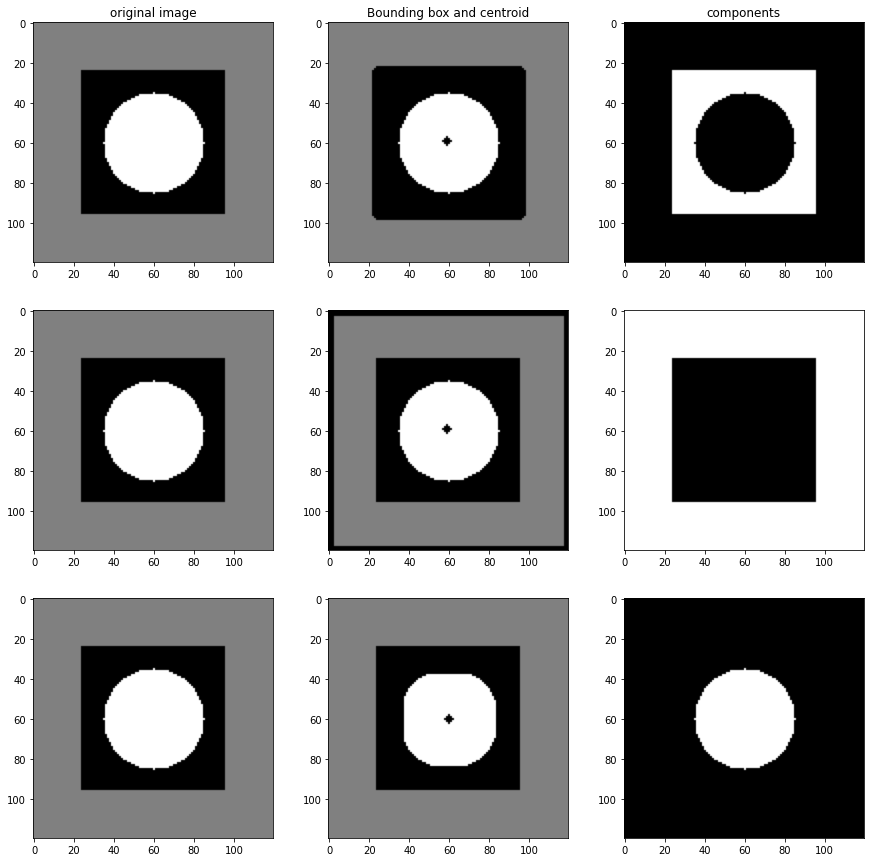

In [6]:
#square nut
image_num = 1
fig, ax = plt.subplots(numLabels[image_num], 3, figsize = (15, (numLabels[image_num] + 2)*3))

for i in range(numLabels[image_num]):
    x = stats[image_num][i, cv.CC_STAT_LEFT]
    y = stats[image_num][i, cv.CC_STAT_TOP]
    w = stats[image_num][i, cv.CC_STAT_WIDTH]
    h = stats[image_num][i, cv.CC_STAT_HEIGHT]
    area = stats[image_num][i, cv.CC_STAT_AREA]
    (cX, cY) = centroids[image_num][i]

    print("area of componenet", i+1,"=", area)

    output = images[image_num].copy()
    cv.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 3)
    cv.circle(output, (int(cX), int(cY)), 2, (0, 0, 255), -1)

    componentMask = (images[image_num] == i).astype("uint8")*255

    ax[i][0].imshow(images[image_num], 'gray')
    ax[i][1].imshow(output, 'gray')
    ax[i][2].imshow(componentMask, 'gray')
    

ax[0][0].set_title("original image")
ax[0][1].set_title("Bounding box and centroid")
ax[0][2].set_title("components");

area of componenet 1 = 13930
area of componenet 2 = 2051826
area of componenet 3 = 1961
area of componenet 4 = 1961
area of componenet 5 = 1961
area of componenet 6 = 1961


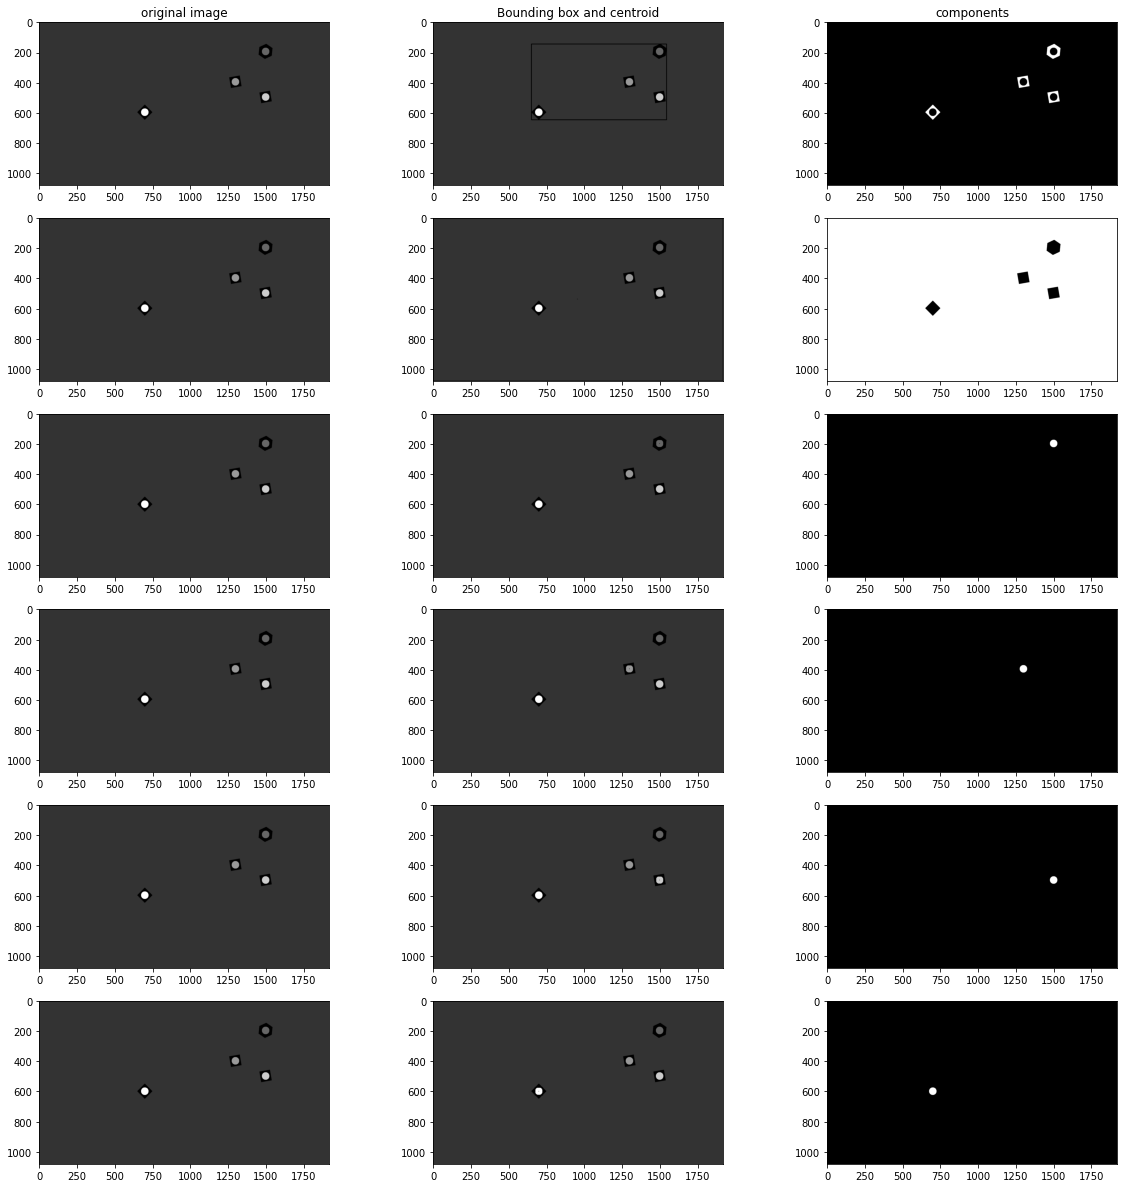

In [7]:
#convoyer belt

image_num = 2
fig, ax = plt.subplots(numLabels[image_num], 3, figsize = (20, (numLabels[image_num] + 1)*3))

for i in range(numLabels[image_num]):
    x = stats[image_num][i, cv.CC_STAT_LEFT]
    y = stats[image_num][i, cv.CC_STAT_TOP]
    w = stats[image_num][i, cv.CC_STAT_WIDTH]
    h = stats[image_num][i, cv.CC_STAT_HEIGHT]
    area = stats[image_num][i, cv.CC_STAT_AREA]
    (cX, cY) = centroids[image_num][i]

    print("area of componenet", i+1,"=", area)

    output = images[image_num].copy()
    cv.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 3)
    cv.circle(output, (int(cX), int(cY)), 2, (0, 0, 255), -1)

    componentMask = (images[image_num] == i).astype("uint8")*255

    ax[i][0].imshow(images[image_num], 'gray')
    ax[i][1].imshow(output, 'gray')
    ax[i][2].imshow(componentMask, 'gray')
    

ax[0][0].set_title("original image")
ax[0][1].set_title("Bounding box and centroid")
ax[0][2].set_title("components");

Contour analysis

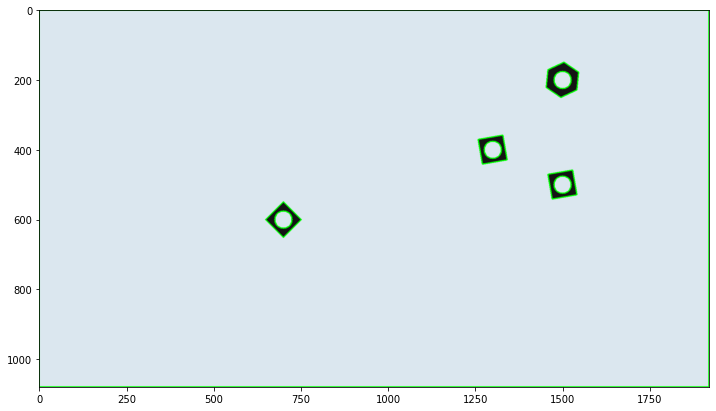

In [8]:
import random

contours, hierarchy = cv.findContours(conveyor_f100_th, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
im = conveyor_f100.copy()

cv.drawContours(image=im, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv.LINE_AA)

fig, ax = plt.subplots(figsize = (12, 10))
ax.imshow(im);

In [36]:

cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)

cap = cv.VideoCapture('conveyor.mp4')
f = 0
frame = []   
frames = []   
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break
    
    frames.append(frame)
    
    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.


0.02370883219245523
0.02370883219245523
0.02370883219245523
0.02370883219245523
0.02370883219245523
0.02370883219245523


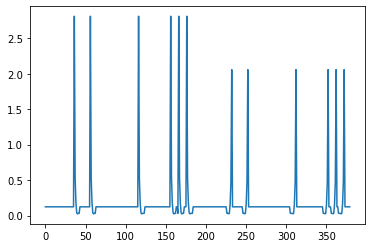

In [69]:
import imutils

# Yor code here.
bg = np.ones(frames[0].shape).astype("uint8")*frames[0][0][0]


contours,hierarchy = cv.findContours(hexnut_template_th, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cnt1 = contours[0]

# Writing the video

frame_array = []
shape = (1080, 1920, 3)


# Your code here
thres = 0.1
count = 0
sim = []
search = False

for i in range(len(frames)):
    frame = frames[i]
    frame_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    ret1, frame_gray = cv.threshold(frame_gray, 0,255, cv.THRESH_BINARY+cv.THRESH_OTSU)
    contours,hierarchy = cv.findContours(frame_gray, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    cnt2 = contours[0]

    ret = cv.matchShapes(cnt1, cnt2, 1, 0.0)
    sim.append(ret)

    if ret > 2.3:
        search = True
    
    if search and ret < 0.025:
        print(ret)
        search = False

plt.plot(np.arange(len(frames)), np.array(sim))
plt.show()

# out = cv.VideoWriter('./conveyor_result_indexno.mp4',cv.VideoWriter_fourcc(*'h264'), 30, (shape[1], shape[0]))
 
# for i in range(len(frame_array)):
#     cv.imshow('Frame', frame_array[i])
#     if cv.waitKey(1) == ord('q'):
#         break
#     out.write(frame_array[i])

# out.release()
# cv.destroyAllWindows()

In [73]:
contours,hierarchy = cv.findContours(hexnut_template_th, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cnt1 = contours[0]
contours,hierarchy = cv.findContours(squarenut_template_th, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cnt2 = contours[0]
contours,hierarchy = cv.findContours(hexnut_template_th, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cnt3 = contours[0]

ret = cv.matchShapes(cnt1, cnt3, 1, 0.0)
print(ret)


0.0
